In [10]:
%matplotlib inline
from pandas import DataFrame, read_csv, read_table
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerLine2D
from matplotlib import dates, rc, font_manager
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import pandas as pd #this is how I usually import pandas

#Change this to the location of your own isodopes folder
Dir = '/Users/cynthiagerlein/Dropbox (Personal)/Github/isodopes/'

matplotlib.rcParams.update({'font.size': 12, 'font.family': 'serif'})

In [11]:
#spectra_file = r'./dat/absorption_spectra.csv'
Data_dir = Dir + 'dat/'
Fig_dir = Dir + 'fig/'
spectra = pd.read_csv(Data_dir+'absorption_spectra.csv')

#Define properties for plot style
sizeOfFont = 12
fontProperties = {'family':'serif','serif':['Times'],
    'weight' : 'normal', 'size' : sizeOfFont}
ticks_font = font_manager.FontProperties(family='Times', style='normal',
    size=sizeOfFont, weight='normal', stretch='normal')
rc('text', usetex=True)
rc('font',**fontProperties)


# Appendix 1: Infrared Absorption Spectra

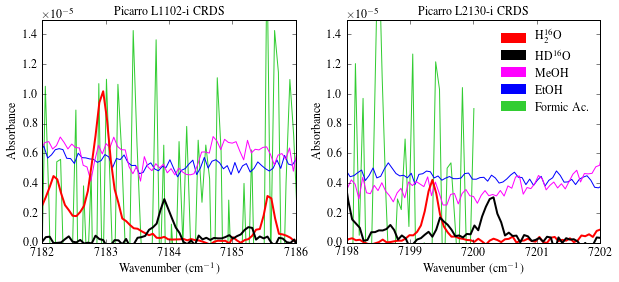

In [13]:
os.chdir(Fig_dir)
fig, axes = plt.subplots(1, 2, figsize=(10,4))
fudge = 10**(-6)

L1102 = 7184
breadth = 2
axes[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axes[0].set_title("Picarro L1102-i CRDS", fontsize = sizeOfFont)
axes[0].plot(spectra.wn_facid, spectra.abs10e6_facid*fudge, 'limegreen')
axes[0].plot(spectra.wn_etoh, spectra.abs10e6_etoh*fudge,'blue')
axes[0].plot(spectra.wn_meoh, spectra.abs10e6_meoh*fudge,'magenta')
axes[0].plot(spectra.wn_h2o, spectra.abs10e6_h2o*fudge,'red', linewidth=2.0)
axes[0].plot(spectra.wn_hdo, spectra.abs10e6_hdo*fudge, 'black', linewidth=2.0)
axes[0].locator_params(axis = 'x', nbins=5)
axes[0].xaxis.set_major_formatter(FormatStrFormatter('%d'))
axes[0].plot([0, 15], lw = 2)
# ^ replace this with a patch
axes[0].set_xlim([L1102-breadth, L1102+breadth])
axes[0].set_ylim([0, 15*fudge])
axes[0].set_xlabel('Wavenumber (cm$^{-1}$)')
axes[0].set_ylabel('Absorbance')

L2130 = 7200
axes[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axes[1].set_title("Picarro L2130-i CRDS", fontsize = sizeOfFont)
axes[1].plot(spectra.wn_facid, spectra.abs10e6_facid*fudge, 'limegreen')
axes[1].plot(spectra.wn_etoh, spectra.abs10e6_etoh*fudge,'blue')
axes[1].plot(spectra.wn_meoh, spectra.abs10e6_meoh*fudge,'magenta')
axes[1].plot(spectra.wn_h2o, spectra.abs10e6_h2o*fudge,'red', linewidth=2.0)
axes[1].plot(spectra.wn_hdo, spectra.abs10e6_hdo*fudge, 'black', linewidth=2.0)
axes[1].locator_params(axis = 'x', nbins=5)
axes[1].xaxis.set_major_formatter(FormatStrFormatter('%d'))
axes[1].plot([0, 15], lw = 2)
# ^ replace this with a patch
axes[1].set_xlim([L2130-breadth, L2130+breadth])
axes[1].set_ylim([0,15*fudge])
axes[1].set_xlabel('Wavenumber (cm$^{-1}$)')
axes[1].set_ylabel('Absorbance')

# Legend (outside right)
h2o_patch = mpatches.Patch(color='red', label='H$_2^{16}$O')
hdo_patch = mpatches.Patch(color='black', label='HD$^{16}$O')
meoh_patch = mpatches.Patch(color='magenta', label='MeOH')
etoh_patch = mpatches.Patch(color='blue', label='EtOH')
facid_patch = mpatches.Patch(color='limegreen', label='Formic Ac.')

#plt.legend(handles=[h2o_patch, hdo_patch, meoh_patch, etoh_patch, facid_patch], bbox_to_anchor=(1.65, 0.5), loc = 5);
plt.legend(handles=[h2o_patch, hdo_patch, meoh_patch, etoh_patch, facid_patch], bbox_to_anchor=None, loc = 1, fontsize = sizeOfFont,frameon=False);
plt.savefig('Figure_1_AbsSpectra.pdf', bbox_inches='tight')


Near IR Absorbance Region of 7,180 and 7,200 cm-1: study of overlap between organics and water isotopologues.

TO DO: xaxis labels. narrow the xlims. define the analysis region. add legend (outside right?).

DONE:

1) ANALYSIS REGION: L1102-> 7182.5-7184.5 cm-1 // L2130-> 7199-7200.5 cm-1.
2) Legend completed
3) Axis Labelling

# Figure 1: Alcohols found in nature

In [88]:
#fieldnmr_file = r'./dat/field_sample_nmr.csv'
fieldnmr = pd.read_csv(Data_dir + 'field_sample_nmr.csv')

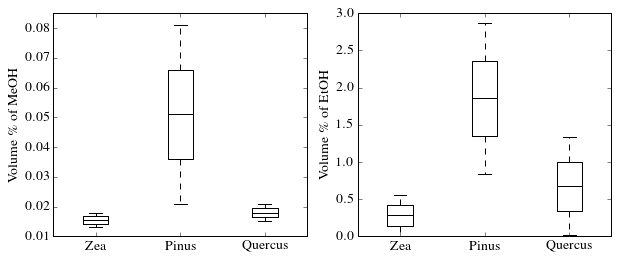

In [194]:
from pylab import *
os.chdir(Fig_dir)
#Define properties for plot style
sizeOfFont = 14
fontProperties = {'family':'serif','serif':['Times'],
    'weight' : 'normal', 'size' : sizeOfFont}
ticks_font = font_manager.FontProperties(family='Times', style='normal',
    size=sizeOfFont, weight='normal', stretch='normal')
rc('text', usetex=True)
rc('font',**fontProperties)
## add patch_artist=True option to ax.boxplot() 
## to get fill color
#bp = ax.boxplot(data_to_plot, patch_artist=True)

fig, axes = plt.subplots(1, 2, figsize=(10,4))

# meoh natural concentrations
meoh_data = [fieldnmr.Corn_Me, fieldnmr.Pine_Me, fieldnmr.Oak_Me]
#axes[0].set_title("MeOH Concentrations")
#axes[0].set_xlabel("Plant Genus")
axes[0].set_ylabel("Volume $\%$ of MeOH")
axes[0].set_ylim([0.01,0.085])
bp = axes[0].boxplot(meoh_data);
## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='black', linewidth=1)
## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='black', linewidth=1)
## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='black', linewidth=1)
## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='black', linewidth=1)
## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='black', alpha=0.5)

# etoh natural concentrations
etoh_data = [fieldnmr.Corn_Et, fieldnmr.Pine_Et, fieldnmr.Oak_Et]
#axes[1].set_title("EtOH Concentrations")
#axes[1].set_xlabel("Plant Genus")
axes[1].set_ylabel("Volume $\%$ of EtOH")
bp = axes[1].boxplot(etoh_data);
## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='black', linewidth=1)
## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='black', linewidth=1)
## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='black', linewidth=1)
## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='black', linewidth=1)
## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='black', alpha=0.5)

# x-axis labelling
labels = [item.get_text() for item in axes[0].get_xticklabels()];
labels[0] = 'Zea'
labels[1] = 'Pinus'
labels[2] = 'Quercus'
axes[0].set_xticklabels(labels);

labels = [item.get_text() for item in axes[1].get_xticklabels()];
labels[0] = 'Zea'
labels[1] = 'Pinus'
labels[2] = 'Quercus'
axes[1].set_xticklabels(labels);

os.chdir(Fig_dir)
plt.savefig('Figure_S1_Natural_Al_Boxplot.pdf', bbox_inches='tight')

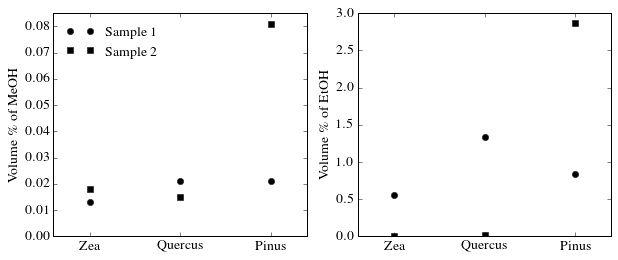

In [43]:
#fieldnmr_file = r'./dat/field_sample_nmr.csv'
fieldnmr = pd.read_csv(Data_dir + 'field_sample_nmr.csv')
from pylab import *
os.chdir(Fig_dir)
#Define properties for plot style
sizeOfFont = 14
fontProperties = {'family':'serif','serif':['Times'],
    'weight' : 'normal', 'size' : sizeOfFont}
ticks_font = font_manager.FontProperties(family='Times', style='normal',
    size=sizeOfFont, weight='normal', stretch='normal')
rc('text', usetex=True)
rc('font',**fontProperties)
## add patch_artist=True option to ax.boxplot() 
## to get fill color
#bp = ax.boxplot(data_to_plot, patch_artist=True)
fig, axes = plt.subplots(1, 2, figsize=(10,4))

# meoh natural concentrations
meoh_data = [fieldnmr.Corn_Me, fieldnmr.Pine_Me, fieldnmr.Oak_Me]
#axes[0].set_title("MeOH Concentrations")
#axes[0].set_xlabel("Plant Genus")
axes[0].set_ylabel("Volume $\%$ of MeOH")
axes[0].set_ylim([0.0,0.085])
axes[0].set_xlim([0.8,2.2])
bp1, = axes[0].plot(1, meoh_data[0][0], marker = 'o', color = 'black',linestyle="None", label = "Sample 1");
bp2, = axes[0].plot(1, meoh_data[0][1], marker = 's', color = 'black',linestyle="None",label="Sample 2");
axes[0].plot(2, meoh_data[1][0], marker = 'o', color = 'black',linestyle="None");
axes[0].plot(2, meoh_data[1][1], marker = 's', color = 'black',linestyle="None");
axes[0].plot(1.5, meoh_data[2][0], marker = 'o', color = 'black',linestyle="None");
axes[0].plot(1.5, meoh_data[2][1], marker = 's', color = 'black',linestyle="None");
plt.setp(axes, xticks=[1, 1.5, 2], xticklabels=['Zea', 'Quercus', 'Pinus'])
axes[0].legend([bp1, bp2], ["Sample 1", "Sample 2"],bbox_to_anchor=None, loc = 2,fontsize = sizeOfFont,frameon=False) 


# etoh natural concentrations
etoh_data = [fieldnmr.Corn_Et, fieldnmr.Pine_Et, fieldnmr.Oak_Et]
#axes[1].set_title("EtOH Concentrations")
#axes[1].set_xlabel("Plant Genus")
axes[1].set_ylabel("Volume $\%$ of EtOH")
axes[1].set_xlim([0.8,2.2])
bp1 = axes[1].plot(1, etoh_data[0][0],marker = 'o', color = 'black',label="Sample 1");
bp = axes[1].plot(1, etoh_data[0][1], marker = 's', color = 'black',label="Sample 2");
bp2 = axes[1].plot(2, etoh_data[1][0], marker = 'o', color = 'black');
bp = axes[1].plot(2, etoh_data[1][1], marker = 's', color = 'black');
bp3 = axes[1].plot(1.5, etoh_data[2][0], marker = 'o', color = 'black');
bp = axes[1].plot(1.5, etoh_data[2][1], marker = 's', color = 'black');
plt.setp(axes, xticks=[1, 1.5, 2], xticklabels=['Zea', 'Quercus', 'Pinus'])

# x-axis labelling
# labels = [item.get_text() for item in axes[0].get_xticklabels()];
# labels[0] = 'Zea'
# labels[1] = 'Pinus'
# labels[2] = 'Quercus'
# axes[0].set_xticklabels(labels);

# labels = [item.get_text() for item in axes[1].get_xticklabels()];
# labels[0] = 'Zea'
# labels[1] = 'Pinus'
# labels[2] = 'Quercus'
# axes[1].set_xticklabels(labels);

os.chdir(Fig_dir)
plt.savefig('Figure_S1_Natural_Alc.pdf', bbox_inches='tight')

In [22]:
etoh_data[0][0]


0.56000000000000005

# Figure 2 & 4: EtOH impacts on apparent isotope values

In [103]:
#etoh_file = r'./dat/etoh_impact.csv'
etoh = pd.read_csv(Data_dir + 'etoh_impact.csv')

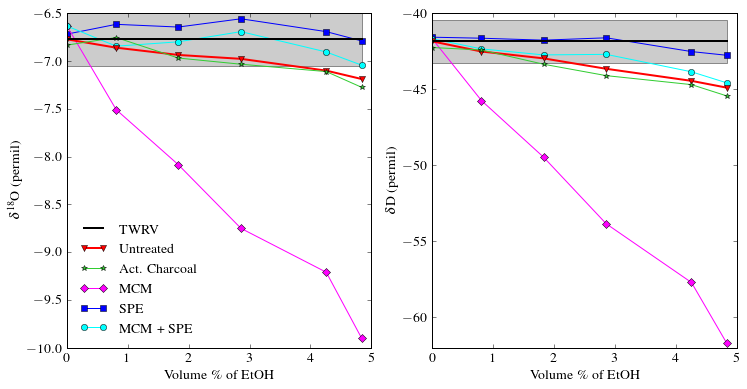

In [190]:
os.chdir(Fig_dir)
#Define properties for plot style
sizeOfFont = 14
fontProperties = {'family':'serif','serif':['Times'],
    'weight' : 'normal', 'size' : sizeOfFont}
ticks_font = font_manager.FontProperties(family='Times', style='normal',
    size=sizeOfFont, weight='normal', stretch='normal')
rc('text', usetex=True)
rc('font',**fontProperties)

fig, axes = plt.subplots(1, 2, figsize=(12,6))
      
#axes[0].set_title("$\delta^{18}$0")
axes[0].set_xlabel("Volume $\%$ of EtOH")
axes[0].set_ylabel("$\delta^{18}$O (permil)")
spe, = axes[0].plot(etoh.etoh, etoh.d18O_spe, label="SPE", color = 'blue', marker = 's')
mcm, = axes[0].plot(etoh.etoh, etoh.d18O_mcmon, label="MCM", color = 'magenta', marker = 'D')
mcmspe, = axes[0].plot(etoh.etoh, etoh.d18O_spe_mcm, label = "MCM + SPE", color = 'cyan', marker = 'o')
unt, = axes[0].plot(etoh.etoh, etoh.d18O_untrt,lw = 2, label="Untreated", color =  'red', marker = 'v')
ac, = axes[0].plot(etoh.etoh, etoh.d18O_ac, label="Activated Charcoal", color = 'limegreen', marker = '*' )
twrv, = axes[0].plot(etoh.etoh, etoh.d18O_true, lw = 2, label="TWRV",color = 'black')
axes[0].set_ylim([-10,-6.5])

#shading in of instrumental error
axes[0].fill_between(etoh.etoh, etoh.instrument_error_d18O_upper[0], etoh.instrument_error_d18O_lower[0], facecolor='grey', alpha=0.4)
axes[1].fill_between(etoh.etoh, etoh.instrument_error_dD_upper[0], etoh.instrument_error_dD_lower[0], facecolor='grey', alpha=0.4)

#axes[1].set_title("$\delta$D")
axes[1].set_xlabel("Volume $\%$ of EtOH")
axes[1].set_ylabel("$\delta$D (permil)")
spe, = axes[1].plot(etoh.etoh, etoh.dD_spe, label="SPE", color = 'blue' , marker = 's')
mcm, = axes[1].plot(etoh.etoh, etoh.dD_mcmon, label="MCM",  color ='magenta', marker = 'D')
mcmspe, = axes[1].plot(etoh.etoh, etoh.dD_spe_mcm, label = "MCM + SPE", color = 'cyan', marker = 'o')
unt, = axes[1].plot(etoh.etoh, etoh.dD_untrt, lw = 2,label="Untreated",  color ='red', marker = 'v')
ac, = axes[1].plot(etoh.etoh, etoh.dD_ac, label="Activated Charcoal", color ='limegreen' , marker = '*')
twrv, = axes[1].plot(etoh.etoh, etoh.dD_true, lw = 2,label="TWRV", color = 'black')
axes[1].set_ylim([-62,-40])

handles, labels = axes[1].get_legend_handles_labels()

#axes[1].legend(bbox_to_anchor=(1.60, 0.5), loc = 5) #legend for figure 2
axes[0].legend([twrv, unt, ac, mcm, spe, mcmspe], ["TWRV", "Untreated", "Act. Charcoal", "MCM", "SPE", "MCM + SPE"],bbox_to_anchor=None, loc = 3,fontsize = sizeOfFont,frameon=False) #legend (same for both) on mid-right. [fig 4]

# TODO: get the 2 sigma noise from K5A QC and represent True as a patch
plt.savefig('Figure_2_EtOH_Impact.pdf', bbox_inches='tight')

Ethanol impacts on delta values with 3 treatment methods:(1) AC, (2) SPE, (3) MCM.

# Figure 3 & 5: MeOH impacts on apparent isotope values

In [130]:
#meoh_file = r'./dat/meoh_impact.csv'
meoh = pd.read_csv(Data_dir + 'meoh_impact.csv')

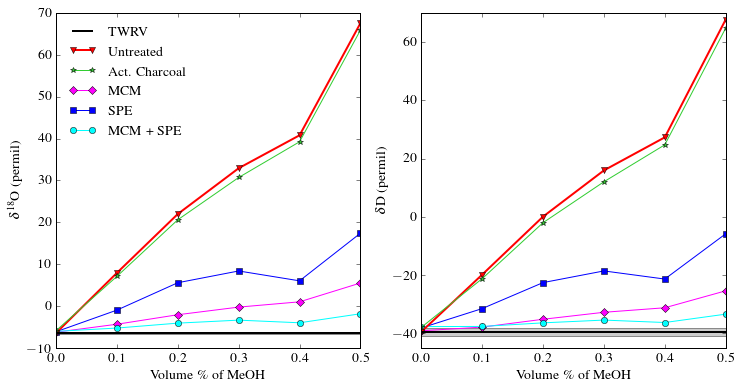

In [192]:
os.chdir(Fig_dir)
#Define properties for plot style
sizeOfFont = 14
fontProperties = {'family':'serif','serif':['Times'],
    'weight' : 'normal', 'size' : sizeOfFont}
ticks_font = font_manager.FontProperties(family='Times', style='normal',
    size=sizeOfFont, weight='normal', stretch='normal')
rc('text', usetex=True)
rc('font',**fontProperties)

fig, axes = plt.subplots(1, 2, figsize=(12,6))

#axes[0].set_title("$\delta^{18}$0")
axes[0].set_xlabel("Volume $\%$ of MeOH %")
axes[0].set_ylabel("$\delta^{18}$O (permil)")
#axes[0].plot(meoh.Me_Conc, meoh.MeSPE_d18O, label="SPE (MeOH Conditioning)")
#axes[0].plot(meoh.Me_Conc, meoh.EtSPE_d18O, label="SPE (EtOH Conditioning)", 'blue')
spe, = axes[0].plot(meoh.Me_Conc, meoh.EtSPE_d18O, label="SPE (EtOH Conditioning)", color = 'blue', marker = 's')
mcm, = axes[0].plot(meoh.Me_Conc, meoh.MCM_d18O, label="MCM", color = 'magenta', marker = 'D')
mcmspe, = axes[0].plot(meoh.Me_Conc, meoh.MCM_EtSPE_d18O, label="MCM + EtOH SPE", color = 'cyan', marker = 'o')
unt, = axes[0].plot(meoh.Me_Conc, meoh.Control_d18O, lw = 2, label="Untreated", color = 'red', marker = 'v')
ac, = axes[0].plot(meoh.Me_Conc, meoh.AC_d18O, label="Activated Charcoal",color = 'limegreen' , marker = '*' )
twrv, = axes[0].plot(meoh.Me_Conc, meoh.True_d18O, lw = 2, label="TRWV",color = 'black')

#inst. error shading
axes[0].fill_between(meoh.Me_Conc, meoh.instrument_error_d18O_upper[0], meoh.instrument_error_d18O_lower[0], facecolor='grey', alpha=0.4)
axes[1].fill_between(meoh.Me_Conc, meoh.instrument_error_dD_upper[0], meoh.instrument_error_dD_lower[0], facecolor='grey', alpha=0.4)


#axes[1].set_title("dD")
axes[1].set_xlabel("Volume $\%$ of MeOH %")
axes[1].set_ylabel("$\delta$D (permil)")
#axes[1].plot(meoh.Me_Conc, meoh.MeSPE_dD, label="SPE (MeOH Conditioning)")
#axes[1].plot(meoh.Me_Conc, meoh.EtSPE_dD, label="SPE (EtOH Conditioning)", 'blue')
spe, = axes[1].plot(meoh.Me_Conc, meoh.EtSPE_dD, label="SPE",color = 'blue', marker = 's')
mcm, = axes[1].plot(meoh.Me_Conc, meoh.MCM_dD, label="MCM", color ='magenta', marker = 'D')
mcmspe, = axes[1].plot(meoh.Me_Conc, meoh.MCM_EtSPE_dD, label="MCM + EtOH SPE", color ='cyan', marker = 'o')
unt, = axes[1].plot(meoh.Me_Conc, meoh.Control_dD, lw = 2, label="Untreated", color ='red', marker = 'v')
ac, = axes[1].plot(meoh.Me_Conc, meoh.AC_dD, label="Activated Charcoal",color ='limegreen' , marker = '*' )
twrv, = axes[1].plot(meoh.Me_Conc, meoh.True_dD, lw = 2, label="TRWV",color ='black')
plt.axis([0, 0.5, -45, 70])

#axes[1].legend(bbox_to_anchor=(1.550, 0.5), loc = 5) #legend for figure 3
axes[0].legend([twrv, unt, ac, mcm, spe, mcmspe], ["TWRV", "Untreated", "Act. Charcoal", "MCM", "SPE", "MCM + SPE"],bbox_to_anchor=None, loc = 2,fontsize = sizeOfFont,frameon=False) #legend (same for both) on mid-right. [fig 4]

plt.savefig('Figure_3_MeOH_Impact.pdf', bbox_inches='tight')


# Appendix  2: Instrumental error from QC analysis

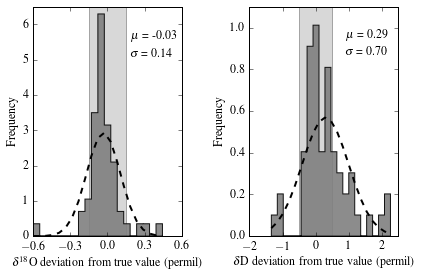

In [217]:
#qc_file = r'./dat/K5A_QC_Variation.csv'
qc = pd.read_csv(Data_dir + 'K5A_QC_Variation.csv')

HERA_d18O_true = qc.HERA_d18O_true[0]
HERA_dD_true = qc.HERA_dD_true[0]
HERA_d18O_err = 0.15
HERA_dD_err = 0.5

import numpy as np
import pylab as P

#Define properties for plot style
sizeOfFont = 12
fontProperties = {'family':'serif','serif':['Times'],
    'weight' : 'normal', 'size' : sizeOfFont}
ticks_font = font_manager.FontProperties(family='Times', style='normal',
    size=sizeOfFont, weight='normal', stretch='normal')
rc('text', usetex=True)
rc('font',**fontProperties)


os.chdir(Fig_dir)
# fig, axes = plt.subplots(1, 3, figsize=(10,45))
P.figure()

############### d18O subplot ###################
P.subplot(121)
mu = np.mean(qc.HERA_d18O-HERA_d18O_true)
sigma = np.std(qc.HERA_d18O-HERA_d18O_true)

n, bins, patches = P.hist(qc.HERA_d18O-HERA_d18O_true, 20, normed=True, histtype='stepfilled')
P.setp(patches, 'facecolor', 'gray', 'alpha', 0.90)

# add a line showing the expected distribution
y = P.normpdf(bins, mu, sigma)
P.plot(bins, y, 'k--', linewidth=2)
mutext = "$\mu$ = %4.2f" % mu
sigtext = "$\sigma$ = %4.2f" % sigma
P.text(mu+0.21, 5.6, mutext)
P.text(mu+0.21, 5.1, sigtext)
P.xlabel('$\delta^{18}$O deviation from true value (permil)')
P.ylabel('Frequency')
#Shade the area of LGR uncertainty
P.fill_between(np.array([-HERA_d18O_err, +HERA_d18O_err]), 0, 6.5, facecolor='grey', alpha=0.3)
P.ylim((0, 6.5))
P.xticks([-0.6,-0.3,0,0.3,0.6])

############### dD subplot ###################
P.subplot(122)
mu = np.mean(qc.HERA_dD-HERA_dD_true)
sigma = np.std(qc.HERA_dD-HERA_dD_true)

n, bins, patches = P.hist(qc.HERA_dD-HERA_dD_true, 20, normed=True, histtype='stepfilled')
P.setp(patches, 'facecolor', 'gray', 'alpha', 0.9)

# add a line showing the expected distribution
y = P.normpdf(bins, mu, sigma)
P.ylabel('Frequency')
P.plot(bins, y, 'k--', linewidth=2)
mutext = "$\mu$ = %4.2f" % mu
sigtext = "$\sigma$ = %4.2f" % sigma
P.text(mu+0.6, 0.95, mutext)
P.text(mu+0.6, 0.87, sigtext)
#Shade the area of LGR uncertainty
P.fill_between(np.array([-HERA_dD_err, +HERA_dD_err]), 0, 1.1, facecolor='grey', alpha=0.3)
P.xlabel('$\delta$D deviation from true value (permil)')
P.xticks([-2,-1,0,1,2])
P.ylim((0, 1.1))

plt.tight_layout()

plt.savefig('Figure_S2_QC_dis_LGRValue_centered.pdf', bbox_inches='tight')

##### Normal distribution plot of the K5A value differences from the known (bottle) value.
+/- 2 sigma defines the upper and lower thresholds for instrumental error.

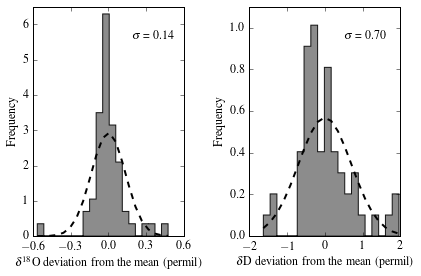

In [216]:
#qc_file = r'./dat/K5A_QC_Variation.csv'
qc = pd.read_csv(Data_dir + 'K5A_QC_Variation.csv')

HERA_d18O_true = qc.HERA_d18O_true[0]
HERA_dD_true = qc.HERA_dD_true[0]
HERA_d18O_err = 0.15
HERA_dD_err = 0.5

import numpy as np
import pylab as P

#Define properties for plot style
sizeOfFont = 12
fontProperties = {'family':'serif','serif':['Times'],
    'weight' : 'normal', 'size' : sizeOfFont}
ticks_font = font_manager.FontProperties(family='Times', style='normal',
    size=sizeOfFont, weight='normal', stretch='normal')
rc('text', usetex=True)
rc('font',**fontProperties)


os.chdir(Fig_dir)
# fig, axes = plt.subplots(1, 3, figsize=(10,45))
P.figure()

############### d18O subplot ###################
P.subplot(121)
Mean_Value = np.mean(qc.HERA_d18O)
mu = np.mean(qc.HERA_d18O-Mean_Value)
sigma = np.std(qc.HERA_d18O-Mean_Value)

n, bins, patches = P.hist(qc.HERA_d18O-Mean_Value, 20, normed=True, histtype='stepfilled')
P.setp(patches, 'facecolor', 'gray', 'alpha', 0.90)

# add a line showing the expected distribution
y = P.normpdf(bins, mu, sigma)
P.plot(bins, y, 'k--', linewidth=2)
#mutext = "$\mu$ = %4.2f" % mu
sigtext = "$\sigma$ = %4.2f" % sigma
#P.text(mu+0.21, 5.6, mutext)
P.text(mu+0.19, 5.6, sigtext)
P.xlabel('$\delta^{18}$O deviation from the mean (permil)')
P.ylabel('Frequency')
#Shade the area of LGR uncertainty
#P.fill_between(np.array([-HERA_d18O_err, +HERA_d18O_err]), 0, 6.5, facecolor='grey', alpha=0.3)
P.ylim((0, 6.5))
P.xticks([-0.6,-0.3,0,0.3,0.6])

############### dD subplot ###################
P.subplot(122)
Mean_Value = np.mean(qc.HERA_dD)
mu = np.mean(qc.HERA_dD-Mean_Value)
sigma = np.std(qc.HERA_dD-Mean_Value)

n, bins, patches = P.hist(qc.HERA_dD-Mean_Value, 20, normed=True, histtype='stepfilled')
P.setp(patches, 'facecolor', 'gray', 'alpha', 0.9)

# add a line showing the expected distribution
y = P.normpdf(bins, mu, sigma)
P.ylabel('Frequency')
P.plot(bins, y, 'k--', linewidth=2)
#mutext = "$\mu$ = %4.2f" % mu
sigtext = "$\sigma$ = %4.2f" % sigma
#P.text(mu+0.5, 0.95, mutext)
P.text(mu+0.5, 0.95, sigtext)
#Shade the area of LGR uncertainty
#P.fill_between(np.array([-HERA_dD_err, +HERA_dD_err]), 0, 1.1, facecolor='grey', alpha=0.3)
P.xlabel('$\delta$D deviation from the mean (permil)')
P.xticks([-2,-1,0,1,2])
P.ylim((0, 1.1))

plt.tight_layout()

plt.savefig('Figure_S2_QC_distrib_MeanCentered.pdf', bbox_inches='tight')

# Appendix 3 & 4 are from MestReNova software

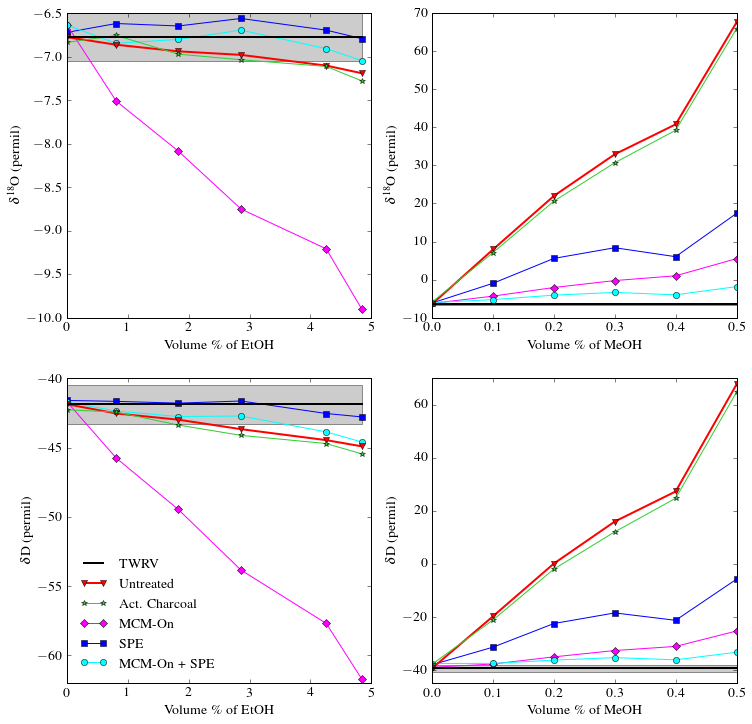

In [193]:
meoh = pd.read_csv(Data_dir + 'meoh_impact.csv')
etoh = pd.read_csv(Data_dir + 'etoh_impact.csv')
os.chdir(Fig_dir)
#Define properties for plot style
sizeOfFont = 14
fontProperties = {'family':'serif','serif':['Times'],
    'weight' : 'normal', 'size' : sizeOfFont}
ticks_font = font_manager.FontProperties(family='Times', style='normal',
    size=sizeOfFont, weight='normal', stretch='normal')
rc('text', usetex=True)
rc('font',**fontProperties)

fig, axes = plt.subplots(2, 2, figsize=(12,12))
      
##############First panel: EtOH and d18O#############
spe, = axes[0,0].plot(etoh.etoh, etoh.d18O_spe, label="SPE", color = 'blue', marker = 's')
mcm, = axes[0,0].plot(etoh.etoh, etoh.d18O_mcmon, label="MCM-On", color = 'magenta', marker = 'D')
mcmspe, = axes[0,0].plot(etoh.etoh, etoh.d18O_spe_mcm, label = "MCM-On + SPE", color = 'cyan', marker = 'o')
unt, = axes[0,0].plot(etoh.etoh, etoh.d18O_untrt,lw = 2, label="Untreated", color =  'red', marker = 'v')
ac, = axes[0,0].plot(etoh.etoh, etoh.d18O_ac, label="Activated Charcoal", color = 'limegreen', marker = '*' )
twrv, = axes[0,0].plot(etoh.etoh, etoh.d18O_true, lw = 2, label="TWRV",color = 'black')
axes[0,0].set_xlabel("Volume $\%$ of EtOH")
axes[0,0].set_ylabel("$\delta^{18}$O (permil)")
axes[0,0].set_ylim([-10,-6.5])

#Shading in of instrumental error
axes[0,0].fill_between(etoh.etoh, etoh.instrument_error_d18O_upper[0], etoh.instrument_error_d18O_lower[0], facecolor='grey', alpha=0.4)
axes[1,0].fill_between(etoh.etoh, etoh.instrument_error_dD_upper[0], etoh.instrument_error_dD_lower[0], facecolor='grey', alpha=0.4)

##############Third panel: EtOH and dD#############
axes[1,0].set_xlabel("Volume $\%$ of EtOH")
axes[1,0].set_ylabel("$\delta$D (permil)")
spe, = axes[1,0].plot(etoh.etoh, etoh.dD_spe, label="SPE", color = 'blue' , marker = 's')
mcm, = axes[1,0].plot(etoh.etoh, etoh.dD_mcmon, label="MCM-On",  color ='magenta', marker = 'D')
mcmspe, = axes[1,0].plot(etoh.etoh, etoh.dD_spe_mcm, label = "MCM-On + SPE", color = 'cyan', marker = 'o')
unt, = axes[1,0].plot(etoh.etoh, etoh.dD_untrt, lw = 2,label="Untreated",  color ='red', marker = 'v')
ac, = axes[1,0].plot(etoh.etoh, etoh.dD_ac, label="Activated Charcoal", color ='limegreen' , marker = '*')
twrv, = axes[1,0].plot(etoh.etoh, etoh.dD_true, lw = 2,label="TWRV", color = 'black')
axes[1,0].set_ylim([-62,-40])
#Get legend info
handles, labels = axes[0,0].get_legend_handles_labels()
axes[1,0].legend([twrv, unt, ac, mcm, spe, mcmspe], ["TWRV", "Untreated", "Act. Charcoal", "MCM-On", "SPE", "MCM-On + SPE"],bbox_to_anchor=None, loc = 3,fontsize = sizeOfFont,frameon=False) #legend (same for both) on mid-right. [fig 4]

##############Second panel: MeOh and d18O#############
axes[0,1].set_xlabel("Volume $\%$ of MeOH %")
axes[0,1].set_ylabel("$\delta^{18}$O (permil)")
spe, = axes[0,1].plot(meoh.Me_Conc, meoh.EtSPE_d18O, label="SPE (EtOH Conditioning)", color = 'blue', marker = 's')
mcm, = axes[0,1].plot(meoh.Me_Conc, meoh.MCM_d18O, label="MCM-On", color = 'magenta', marker = 'D')
mcmspe, = axes[0,1].plot(meoh.Me_Conc, meoh.MCM_EtSPE_d18O, label="MCM-On + EtOH SPE", color = 'cyan', marker = 'o')
unt, = axes[0,1].plot(meoh.Me_Conc, meoh.Control_d18O, lw = 2, label="Untreated", color = 'red', marker = 'v')
ac, = axes[0,1].plot(meoh.Me_Conc, meoh.AC_d18O, label="Activated Charcoal",color = 'limegreen' , marker = '*' )
twrv, = axes[0,1].plot(meoh.Me_Conc, meoh.True_d18O, lw = 2, label="TRWV",color = 'black')

#inst. error shading
axes[0,1].fill_between(meoh.Me_Conc, meoh.instrument_error_d18O_upper[0], meoh.instrument_error_d18O_lower[0], facecolor='grey', alpha=0.4)
axes[1,1].fill_between(meoh.Me_Conc, meoh.instrument_error_dD_upper[0], meoh.instrument_error_dD_lower[0], facecolor='grey', alpha=0.4)

#############Fourth panel: MeOH and dD#############
axes[1,1].set_xlabel("Volume $\%$ of MeOH %")
axes[1,1].set_ylabel("$\delta$D (permil)")
spe, = axes[1,1].plot(meoh.Me_Conc, meoh.EtSPE_dD, label="SPE",color = 'blue', marker = 's')
mcm, = axes[1,1].plot(meoh.Me_Conc, meoh.MCM_dD, label="MCM-On", color ='magenta', marker = 'D')
mcmspe, = axes[1,1].plot(meoh.Me_Conc, meoh.MCM_EtSPE_dD, label="MCM-On + EtOH SPE", color ='cyan', marker = 'o')
unt, = axes[1,1].plot(meoh.Me_Conc, meoh.Control_dD, lw = 2, label="Untreated", color ='red', marker = 'v')
ac, = axes[1,1].plot(meoh.Me_Conc, meoh.AC_dD, label="Activated Charcoal",color ='limegreen' , marker = '*' )
twrv, = axes[1,1].plot(meoh.Me_Conc, meoh.True_dD, lw = 2, label="TRWV",color ='black')
plt.axis([0, 0.5, -45, 70])

#############Saving figure#############
plt.savefig('Combined_EtOH_MeOH_Impact.pdf', bbox_inches='tight')